In [1]:
#  TASK 2
#  Sales Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 13

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/First_Internship/Task2/sales.csv")

print("SALES DATASET LOADED SUCCESSFULLY")
print(df.head(), "\n")

SALES DATASET LOADED SUCCESSFULLY
  Month  Sales  Profit  Marketing_Spend
0   Jan  12000    3000             2000
1   Feb  15000    3500             2200
2   Mar  18000    4200             2500
3   Apr  17000    4100             2400
4   May  21000    5000             2600 



In [9]:
# Calculate extra metrics
df["Profit_Margin"] = (df["Profit"] / df["Sales"]) * 100
df["ROI"] = (df["Profit"] / df["Marketing_Spend"]) * 100


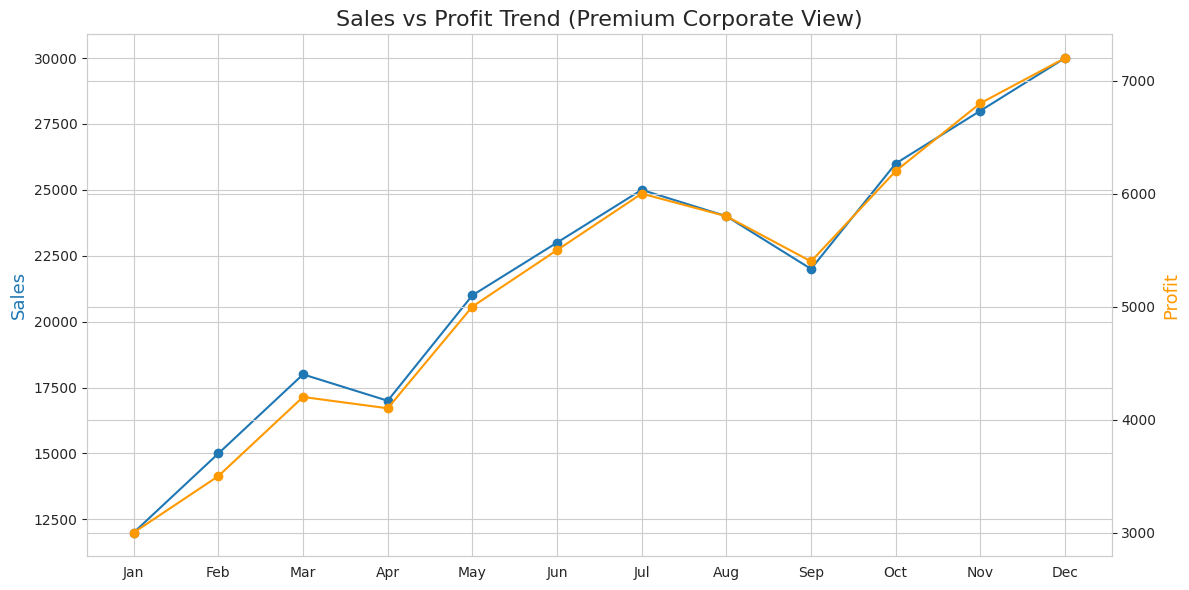

In [3]:

#  Combined Chart (Sales vs Profit)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Month"], df["Sales"], color="#1f77b4", marker="o", label="Sales")
ax1.set_ylabel("Sales", color="#1f77b4")

ax2 = ax1.twinx()
ax2.plot(df["Month"], df["Profit"], color="#ff9900", marker="o", label="Profit")
ax2.set_ylabel("Profit", color="#ff9900")

plt.title("Sales vs Profit Trend (Premium Corporate View)")
fig.tight_layout()
plt.show()


/tmp/ipython-input-829255717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Month"], y=df["Sales_Growth"], palette="Blues")


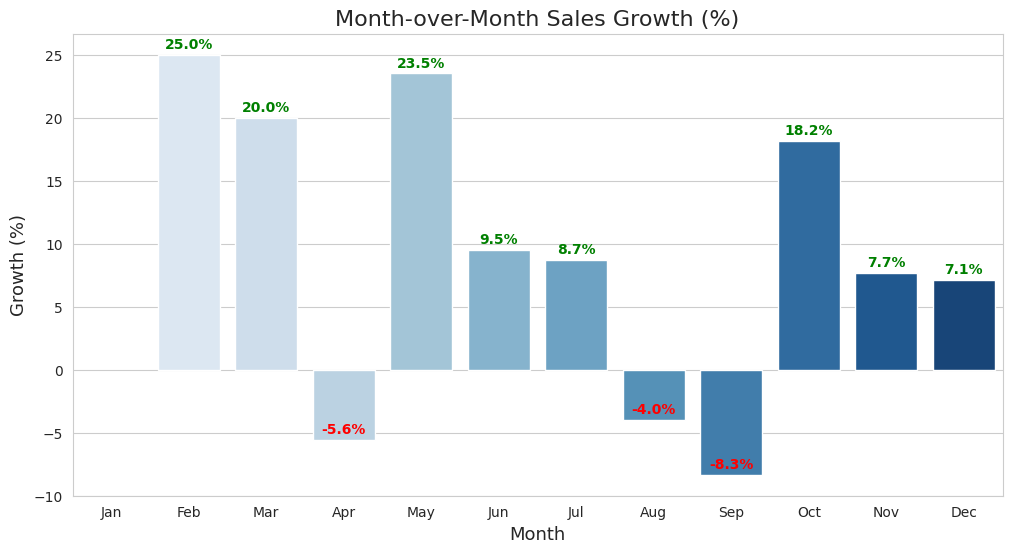

In [4]:

#  Month-over-Month Sales Growth

df["Sales_Growth"] = df["Sales"].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=df["Month"], y=df["Sales_Growth"], palette="Blues")

plt.title("Month-over-Month Sales Growth (%)")
plt.ylabel("Growth (%)")

# Highlight positive/negative
for i, val in enumerate(df["Sales_Growth"]):
    color = "green" if val > 0 else "red"
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', color=color, fontweight='bold')

plt.show()


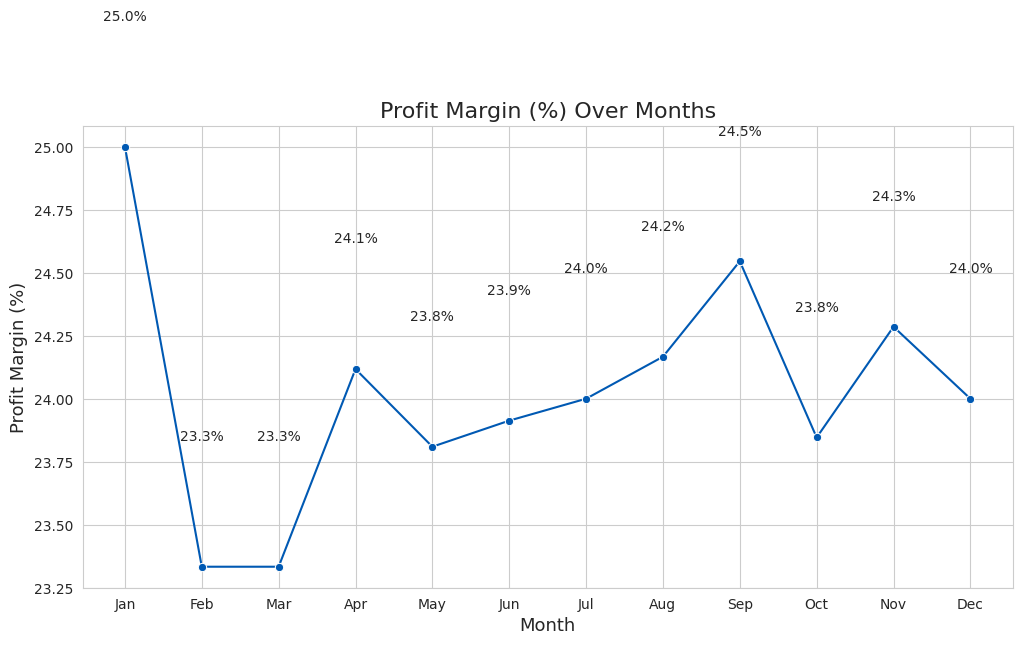

In [5]:
#  Profit Margin Chart

plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Month"], y=df["Profit_Margin"], marker="o", color="#0059b3")

plt.title("Profit Margin (%) Over Months")
plt.ylabel("Profit Margin (%)")

for i, value in enumerate(df["Profit_Margin"]):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center')

plt.show()

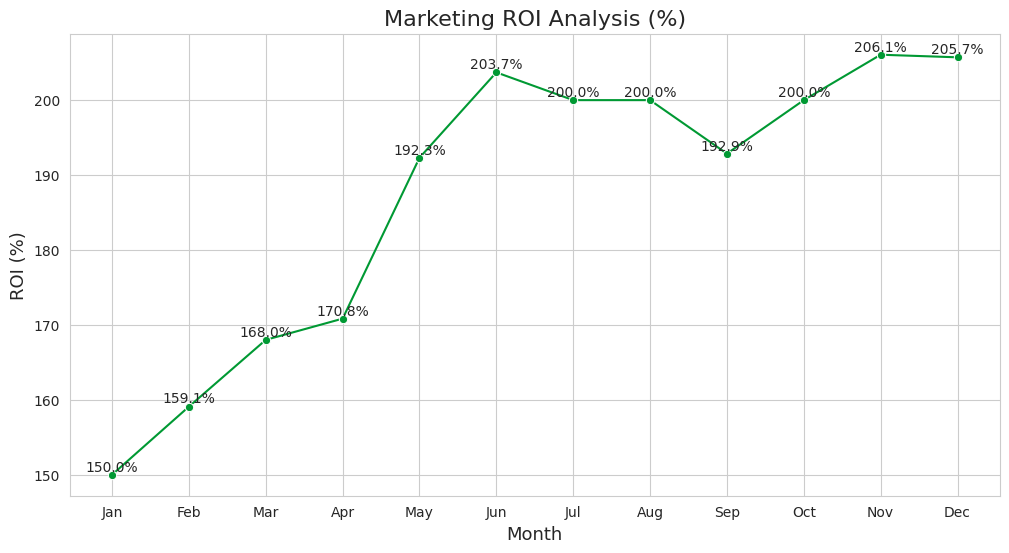

In [6]:

# Marketing ROI Chart (Return on Investment)

plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Month"], y=df["ROI"], marker="o", color="#009933")

plt.title("Marketing ROI Analysis (%)")
plt.ylabel("ROI (%)")

for i, value in enumerate(df["ROI"]):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center')

plt.show()



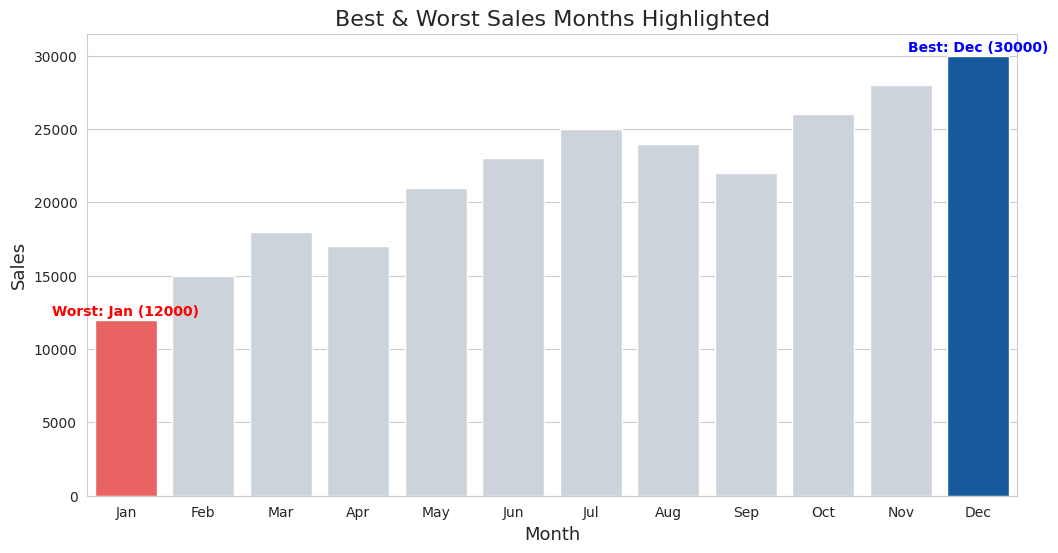

In [7]:

# Highlight Best & Worst Sales Months
best_month = df.loc[df["Sales"].idxmax()]
worst_month = df.loc[df["Sales"].idxmin()]

plt.figure(figsize=(12, 6))
sns.barplot(x=df["Month"], y=df["Sales"], color="#cbd3dd")

# Highlight bars
sns.barplot(x=[best_month["Month"]], y=[best_month["Sales"]], color="#0059b3")
sns.barplot(x=[worst_month["Month"]], y=[worst_month["Sales"]], color="#ff4d4d")

plt.title("Best & Worst Sales Months Highlighted")
plt.ylabel("Sales")

plt.text(
    list(df["Month"]).index(best_month["Month"]),
    best_month["Sales"] + 300,
    f"Best: {best_month['Month']} ({best_month['Sales']})",
    color="blue",
    fontweight="bold",
    ha='center'
)

plt.text(
    list(df["Month"]).index(worst_month["Month"]),
    worst_month["Sales"] + 300,
    f"Worst: {worst_month['Month']} ({worst_month['Sales']})",
    color="red",
    fontweight="bold",
    ha='center'
)

plt.show()



In [8]:

# Auto Insights (Professional)

print("\n BUSINESS INSIGHTS")
print(f"Best Month for Sales: {best_month['Month']} with {best_month['Sales']}")
print(f"Worst Month for Sales: {worst_month['Month']} with {worst_month['Sales']}")
print(f"Highest Profit Margin: {df.loc[df['Profit_Margin'].idxmax()]['Month']}")
print(f"Max ROI Delivered in: {df.loc[df['ROI'].idxmax()]['Month']}")
print("Steady sales increase seen across the year with strong Q4 performance.")



 BUSINESS INSIGHTS
Best Month for Sales: Dec with 30000
Worst Month for Sales: Jan with 12000
Highest Profit Margin: Jan
Max ROI Delivered in: Nov
Steady sales increase seen across the year with strong Q4 performance.
